In [1]:
#Voi pastra regresia logistica ca model
#Nu voi mai folosi PCA pentru reducerea dimensiunii datelor din cauza prezentei 
#variabilelor categoriale cu mai mult de 2 categorii,
#lucru ce complica mult implementarea
#Voi incerca sa reduc dimensiunea datelor prin simpla analiza a lor

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import sklearn as skl
import sklearn.preprocessing as preprocessing
import sklearn.linear_model as linear_model
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import sklearn.tree as tree
import seaborn as sns
import math

In [3]:
dataset=pd.read_csv("data_train.csv")

In [4]:
dataset.head(3)

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,27239,34,Local-gov,144182,Preschool,1,Never-married,Adm-clerical,Own-child,Black,Female,0,0,25,United-States,<=50K
1,19102,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,<=50K
2,16791,26,State-gov,152457,HS-grad,9,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [5]:
#coloanele "education" si "education-num" ne ofera aceleasi informatii,asa ca vom elimina una dintre ele

In [6]:
del dataset["education"]

In [7]:
dataset.head(3)

,Unnamed: 0,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,27239,34,Local-gov,144182,1,Never-married,Adm-clerical,Own-child,Black,Female,0,0,25,United-States,<=50K
1,19102,20,Private,100605,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,<=50K
2,16791,26,State-gov,152457,9,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [8]:
coloane=[
        "workclass","education-num", "marital-status",
        "occupation", "relationship", "race", "sex",
        "hours-per-week", "native-country", "label"]


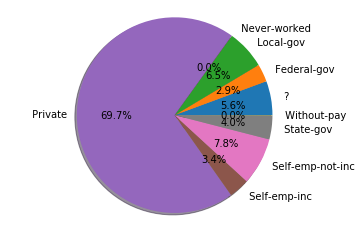

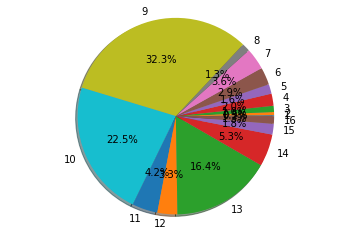

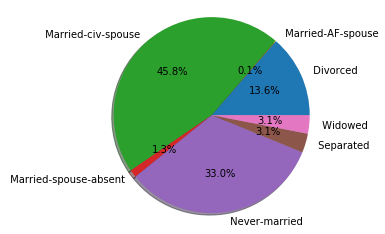

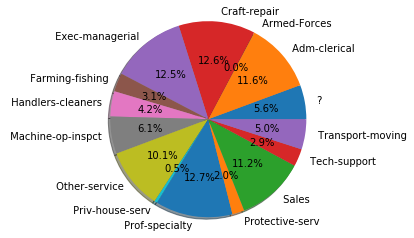

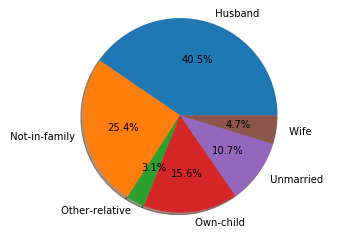

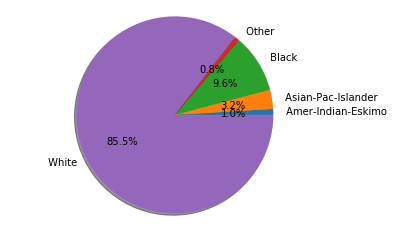

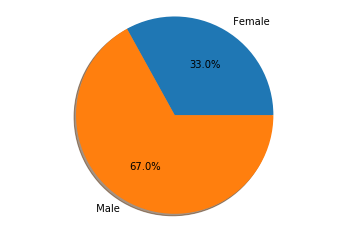

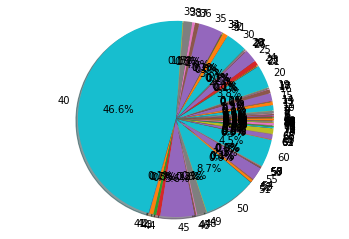

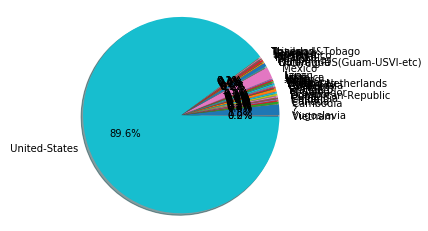

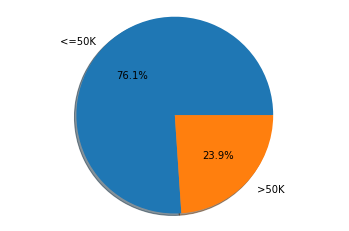

In [9]:
for x in coloane: 
    labels = dataset[x].astype('category').cat.categories.tolist()
    counts = dataset[x].value_counts()
    sizes = [counts[var_cat] for var_cat in labels]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) 
    ax1.axis('equal')
plt.show()

In [10]:
#Observam ca aproape toate persoanele sunt din US si ca sunt albe asa ca voi elimina aceaste coloane.

In [11]:
del dataset["native-country"]

In [12]:
del dataset["race"]

In [13]:
dataset.head(3)

,Unnamed: 0,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,label
0,27239,34,Local-gov,144182,1,Never-married,Adm-clerical,Own-child,Female,0,0,25,<=50K
1,19102,20,Private,100605,9,Never-married,Sales,Own-child,Male,0,0,40,<=50K
2,16791,26,State-gov,152457,9,Never-married,Protective-serv,Not-in-family,Male,0,0,40,<=50K


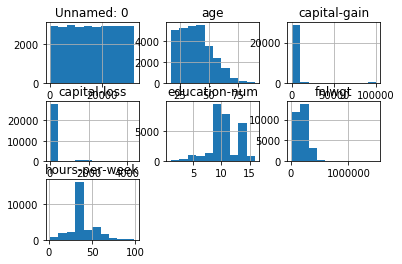

In [14]:
plt.close()
dataset.hist()
plt.show()

In [15]:
#Si coloana "Unnamed: 0" contine informatii nesemnificative asa ca o elimin

In [16]:
del dataset["Unnamed: 0"]

In [17]:
dataset.columns=[ 
        "age", "workclass","fnlwgt","education-num", "marital-status",
        "occupation", "relationship", "sex","capital-gain","capital-loss",
        "hours-per-week", "label"]

In [18]:
train_cols = dataset.columns[0:11]

In [36]:
logit = sm.Logit(dataset['label'], dataset[train_cols])
result = logit.fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

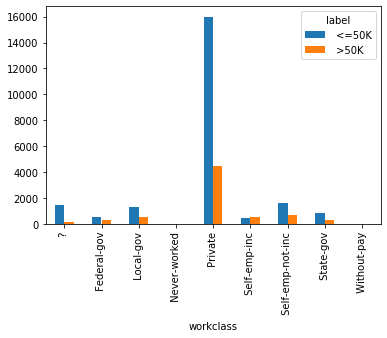

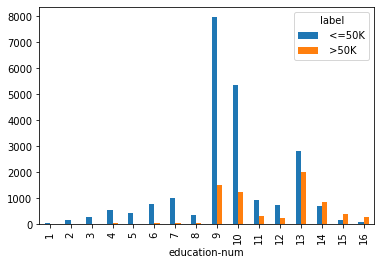

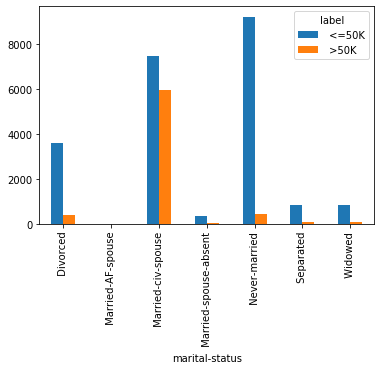

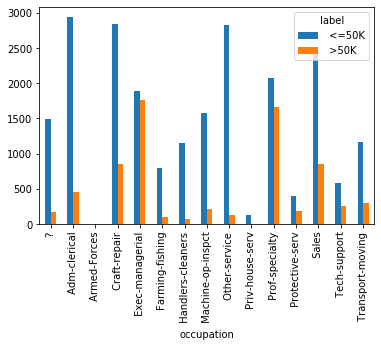

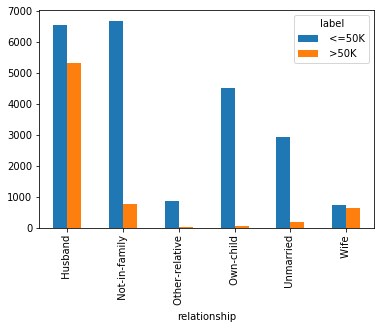

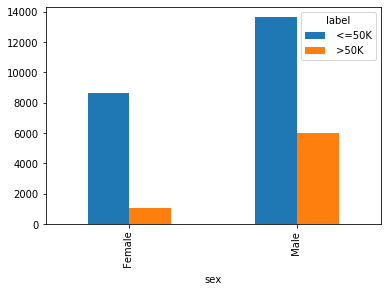

In [25]:
coloanele=["workclass","education-num", "marital-status",
        "occupation", "relationship", "sex"]
for x in coloanele:
    pd.crosstab(dataset[x],dataset.label).plot(kind='bar')
plt.show()

In [26]:
#Din graficul pentru  "education-num" se poate observa cresterea procentului de persoane 
#cu venituri peste 50K odata cu cresterea nivelului de studii.
#Recomandarea este de a completa studiile.